## Specifying the TensorFlow version

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


##Import TensorFlow


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


## Set random seed


In [0]:
tf.random.set_seed(42) # For 2.x

## Load the data


In [7]:
# run this cell to upload file if you are using google colab
from google.colab import files
files.upload()

Saving bank.csv to bank.csv


{'bank.csv': b"RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited\r\n1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0\r\n5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0\r\n6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1\r\n7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0\r\n8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1\r\n9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.5,0\r\n10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0\r\n11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0\r\n12,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,76390.01,0\r\n13,15632264,Kay,476,France,Female,34,10,0,2,1

In [8]:
import io
import pandas as pd
import numpy as np
bank = pd.read_csv('bank.csv')
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
#check for missing values
bank.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# To find the number of customers exited and not exited
# Exited is depicited by value 1 and not Exited is depictied by value 0
bank['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [14]:
# To find the percentage of clients who Exited
exit_yes = len(bank[bank['Exited'] == 1]['Exited'])
exit_no = len(bank[bank['Exited'] == 0]['Exited'])
exit_yes_percentage = (exit_yes/len(bank['Exited'])) * 100
exit_no_percentage = (exit_no/len(bank['Exited'])) * 100
print(exit_yes_percentage)
print(exit_no_percentage)

20.369999999999997
79.63


Above numbers, It shows that 20% of the customers have Exited. This is a classifcation problem and we have to determine if a given customer would Exit or Not

It is also importannt to note that we are dealing with imbalanced Dataset where the Exit to not Exit ratio is 20 : 80

In [15]:
# To list the Unique values for Country and Gender
country = list(bank['Geography'].unique())
gender = list(bank['Gender'].unique())
print(country)
print(gender)

['France', 'Spain', 'Germany']
['Female', 'Male']


In [16]:
# To find the distribution of 3 countries in dataset
bank['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

From above data, we see that 50 % of Customers are French

In [17]:
# To find the distribution of Gender in dataset
bank['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

From above data, the Ratio of Male customers to Female customers is almost same

## Relationship between the Features and Outcome

In [0]:
def count_by_group(bankdata, feature, target):
  df = bankdata.groupby([feature, target])[target].agg(['count'])
  temp = bankdata.groupby([feature])[target].agg(['count'])
  df['pct'] = 100*df.div(temp, level = feature).reset_index()['count'].values
  return df.reset_index()

In [19]:
count_by_group(bank, feature = 'Gender', target = 'Exited')

,Gender,Exited,count,pct
0,Female,0,3404,74.928461
1,Female,1,1139,25.071539
2,Male,0,4559,83.544072
3,Male,1,898,16.455928


In [20]:
count_by_group(bank, feature = 'Geography', target = 'Exited')

,Geography,Exited,count,pct
0,France,0,4204,83.845233
1,France,1,810,16.154767
2,Germany,0,1695,67.556796
3,Germany,1,814,32.443204
4,Spain,0,2064,83.326605
5,Spain,1,413,16.673395


In [21]:

count_by_group(bank, feature = 'HasCrCard', target = 'Exited')

,HasCrCard,Exited,count,pct
0,0,0,2332,79.185059
1,0,1,613,20.814941
2,1,0,5631,79.815734
3,1,1,1424,20.184266


In [22]:
count_by_group(bank, feature = 'IsActiveMember', target = 'Exited')

,IsActiveMember,Exited,count,pct
0,0,0,3547,73.149103
1,0,1,1302,26.850897
2,1,0,4416,85.730926
3,1,1,735,14.269074


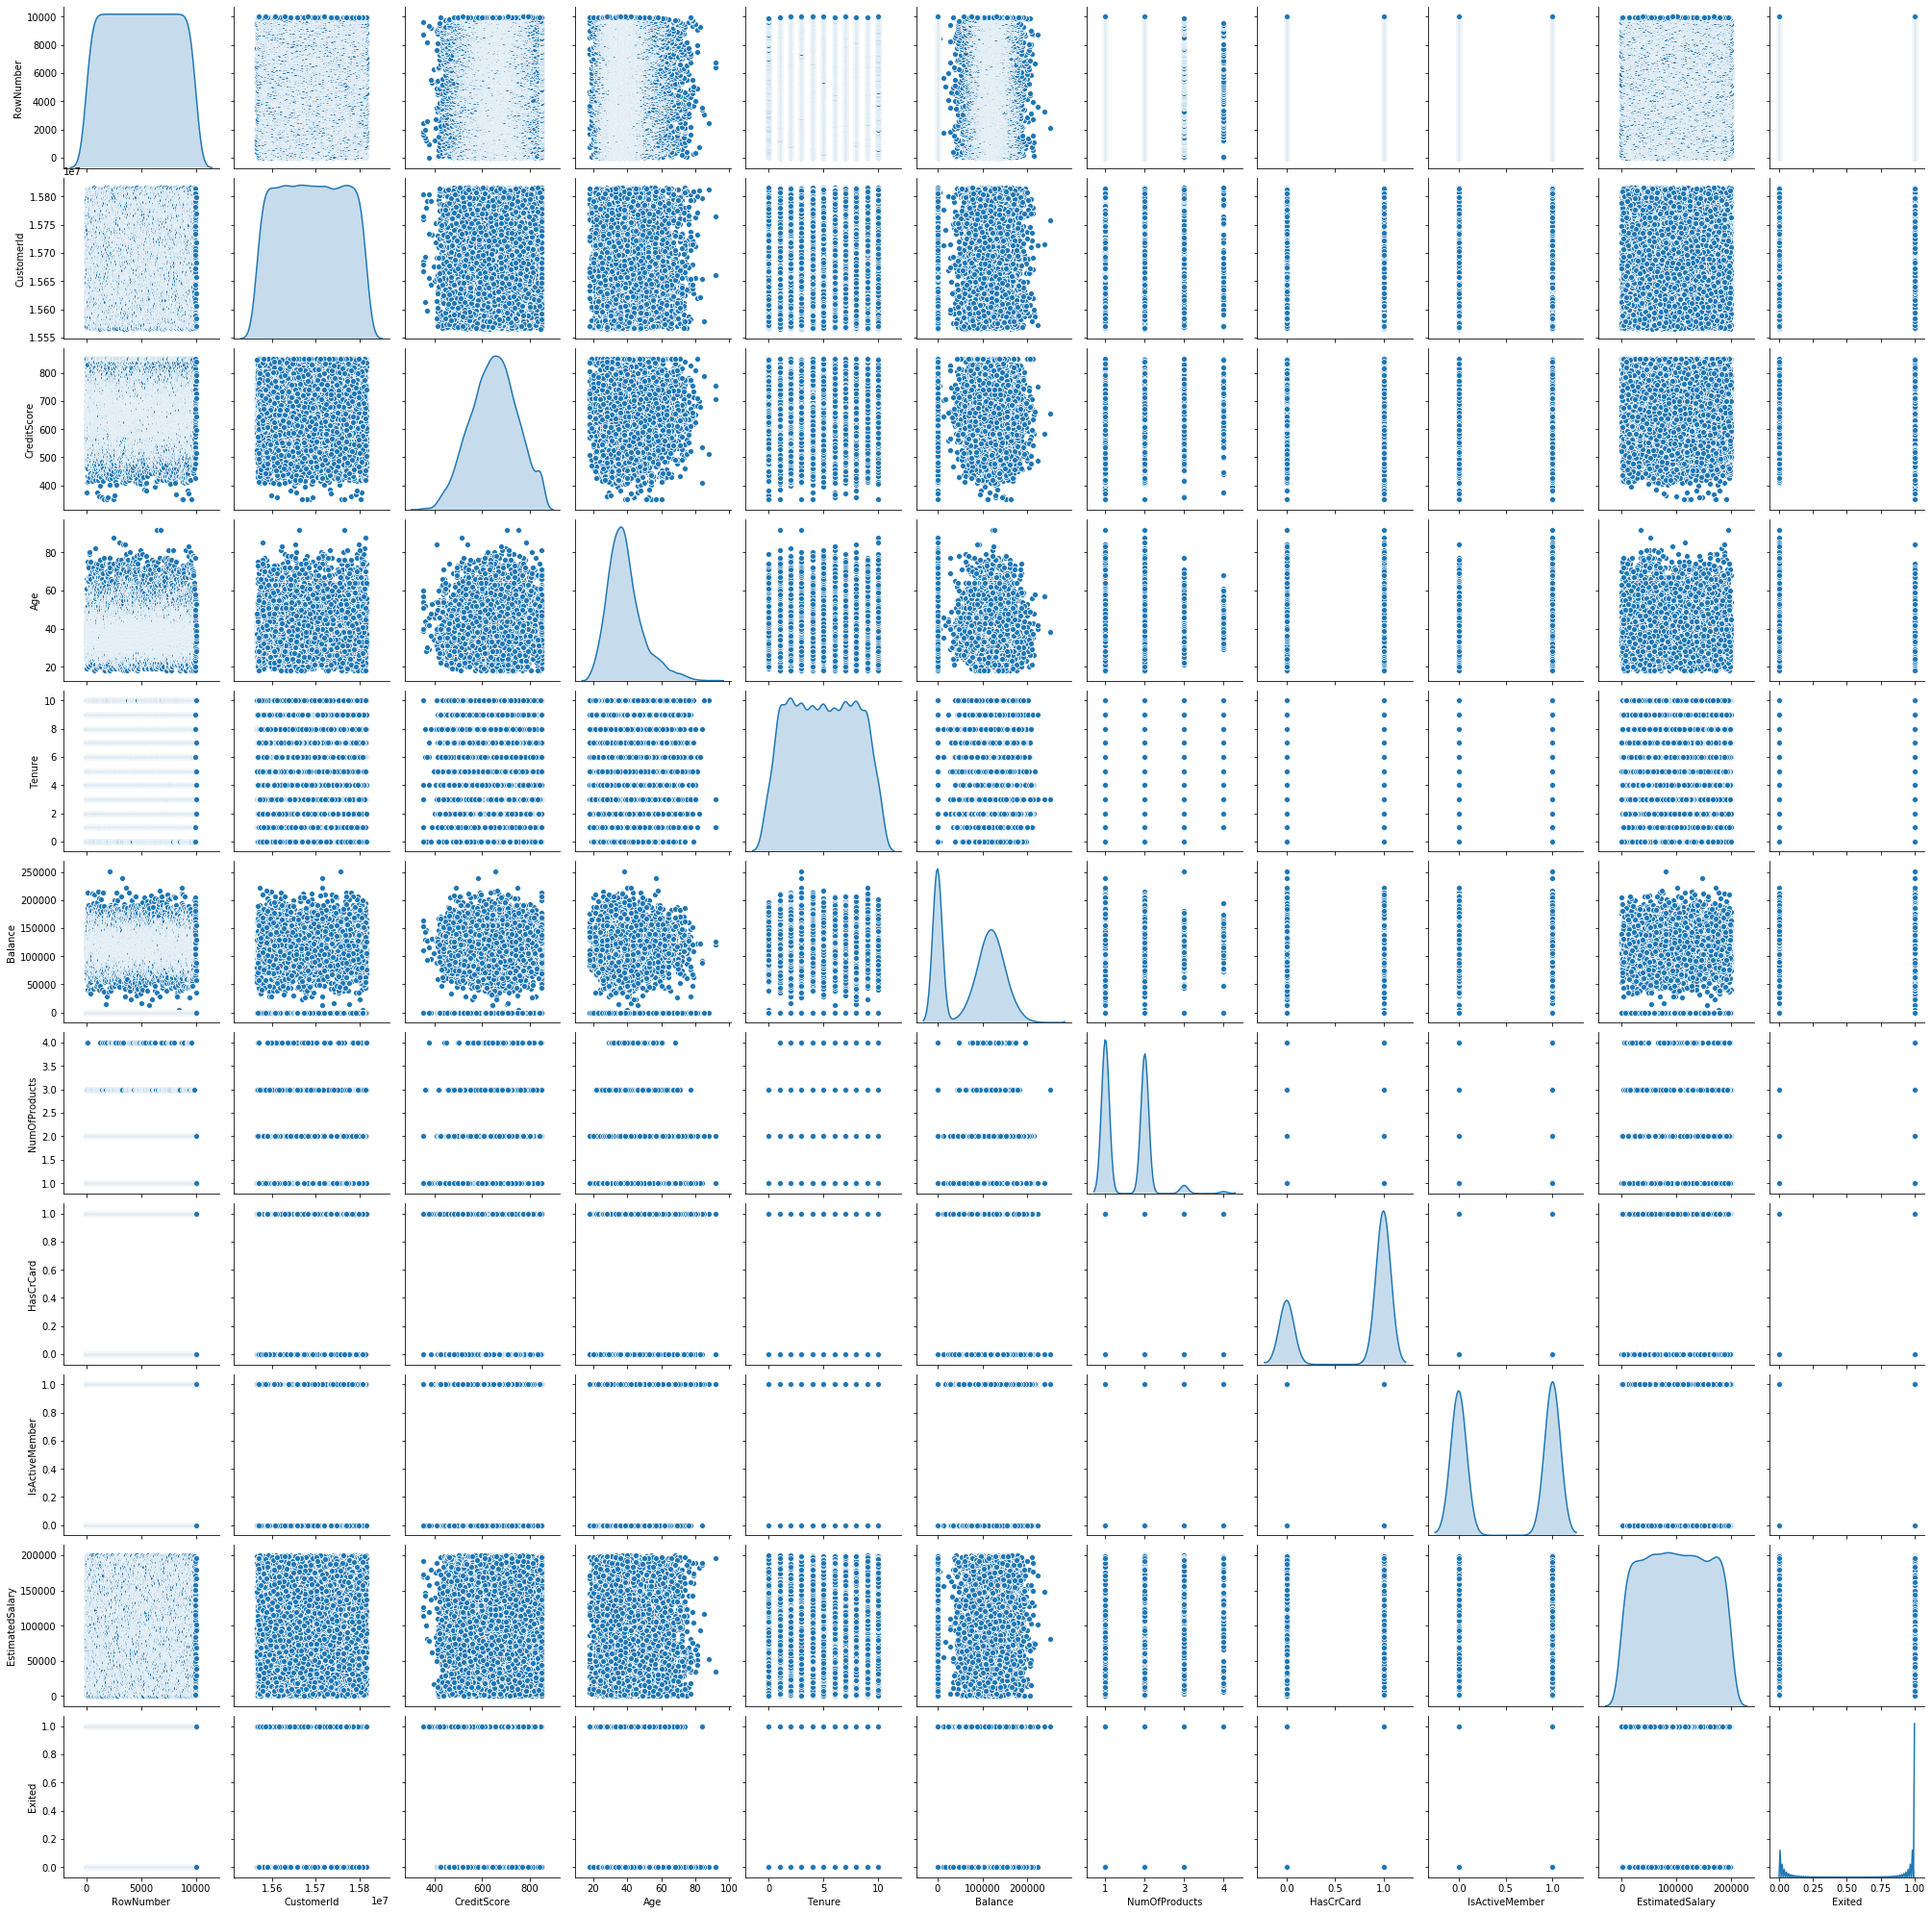

In [23]:
import seaborn as sns

sns.pairplot(data=bank, diag_kind = 'kde')



No handles with labels found to put in legend.


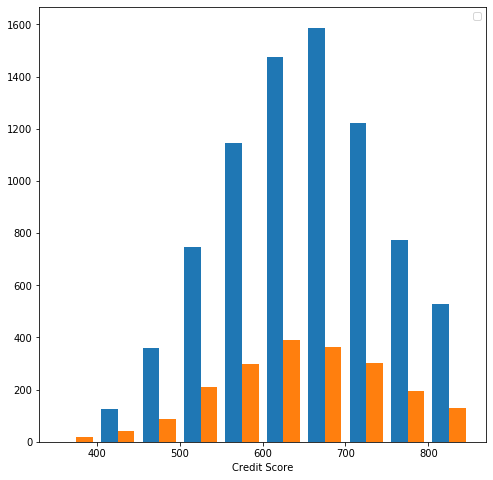

In [24]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize = (8,8))
plt.hist([
        bank[(bank.Exited==0)]['CreditScore'],
        bank[(bank.Exited==1)]['CreditScore']
        ])
plt.xlabel('Credit Score')
plt.legend()


No handles with labels found to put in legend.


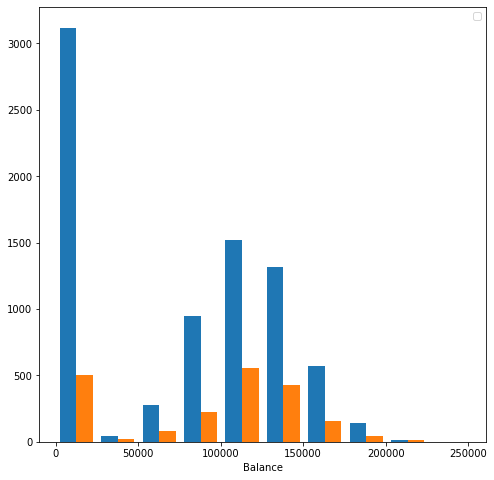

In [25]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize = (8,8))
plt.hist([
        bank[(bank.Exited==0)]['Balance'],
        bank[(bank.Exited==1)]['Balance']
        ])
plt.xlabel('Balance')
plt.legend()

No handles with labels found to put in legend.


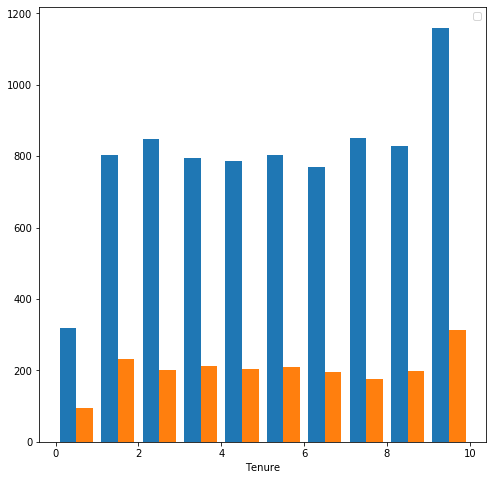

In [26]:
figure = plt.figure(figsize = (8,8))
plt.hist([
        bank[(bank.Exited==0)]['Tenure'],
        bank[(bank.Exited==1)]['Tenure']
        ])
plt.xlabel('Tenure')
plt.legend()

No handles with labels found to put in legend.


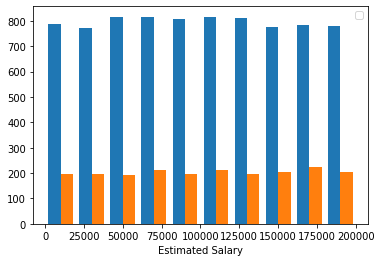

In [27]:
plt.hist([
        bank[(bank.Exited==0)]['EstimatedSalary'],
        bank[(bank.Exited==1)]['EstimatedSalary']
        ])
plt.xlabel('Estimated Salary')
plt.legend()

From the tables and plots above, we have following 
observations

1)Women are lower in number than the men, but have a higher rate to close the account

2)Customers below 40 and above 65 years of age have a tendency to keep their account

3)There is a higher rate of exit in clients from Germany. Almost 2X times compared to French and Spain clients

4)Non Active members tend to discontinue their services with a banl compared with the active clients.

5)The dataset has 96% of clients with 1 or 2 products, customers with 1 product only have a higher rate to close the account 

6)Estimated salary doesn't seem to affect the churn rate bold text

##Drop the columns which are unique for all users like IDs 

In [28]:
bank_df = bank.copy()
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
bank_df = bank_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
bank_df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#Perform One-Hot Encoding on Features "Geography" and "Gender" 

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier as GBSklearn
from xgboost import XGBClassifier as XGB

In [33]:
list_cat = ['Geography', 'Gender']
bank_df = pd.get_dummies(bank_df, columns = list_cat, prefix = list_cat)
bank_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [34]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_France     10000 non-null uint8
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
Gender_Female        10000 non-null uint8
Gender_Male          10000 non-null uint8
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


#Distinguish the feature and target set 

In [0]:
X = bank_df.drop(axis=1, columns=['Exited'])
y = bank_df['Exited']

In [42]:
bank_df.shape


(10000, 14)

In [43]:
X.shape


(10000, 13)

In [44]:

y.shape

(10000,)

# Divide the data set into training and test sets

In [0]:
# Splitting data into train and test sets in Ratio 80 % and 20 % respectively
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [46]:
X_train.shape

(8000, 13)

In [48]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,0,0,1,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,0,1,0,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,1,0,0,1,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,0,1,0,1
356,850,57,8,126776.30,2,1,1,132298.49,0,0,1,1,0


In [47]:
y_train.shape

(8000,)

#Normalize the train and test data

In [0]:
# using StandardScaler for normalization as the features are in different order of magnitude
sc = StandardScaler()
# training set
X_train = sc.fit_transform(X_train)


In [51]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ..., -0.57369368,
         1.09168714, -1.09168714]])

In [0]:
# test set Normalization 
X_test = sc.fit_transform(X_test)

##Initialize & build the model

In [55]:
X_train.shape[1]

13

In [0]:
# NN Model
from keras.models import Sequential
from tensorflow.keras.layers import Dense,  Dropout


In [0]:
from tensorflow.keras import layers
model = tf.keras.Sequential()

In [0]:
# Input layer

model.add(Dense(13, activation = 'relu', input_shape = (13, )))
model.add(Dropout(rate=0.1))

In [0]:
# Adding hidden layer 
model.add(Dense(13, activation = 'relu')) 
model.add(Dropout(rate=0.1)) 

In [0]:
# Adding the output layer
# output 1 node, Customer would stay with the bank or not
# using the sigmoid to get probability outcome
model.add(Dense(1, activation = 'sigmoid')) 

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 13)                182       
_________________________________________________________________
dropout (Dropout)            (None, 13)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dropout_1 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 14        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

#Fitting the model

In [69]:
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=2)

Train on 7200 samples, validate on 800 samples
Epoch 1/200
7200/7200 - 1s - loss: 0.6484 - accuracy: 0.6575 - val_loss: 0.5351 - val_accuracy: 0.7950
Epoch 2/200
7200/7200 - 0s - loss: 0.5279 - accuracy: 0.7953 - val_loss: 0.5120 - val_accuracy: 0.7950
Epoch 3/200
7200/7200 - 0s - loss: 0.5116 - accuracy: 0.7961 - val_loss: 0.5017 - val_accuracy: 0.7950
Epoch 4/200
7200/7200 - 0s - loss: 0.5053 - accuracy: 0.7965 - val_loss: 0.4947 - val_accuracy: 0.7950
Epoch 5/200
7200/7200 - 0s - loss: 0.4938 - accuracy: 0.7961 - val_loss: 0.4891 - val_accuracy: 0.7950
Epoch 6/200
7200/7200 - 0s - loss: 0.4872 - accuracy: 0.7971 - val_loss: 0.4839 - val_accuracy: 0.7962
Epoch 7/200
7200/7200 - 0s - loss: 0.4820 - accuracy: 0.7983 - val_loss: 0.4793 - val_accuracy: 0.7962
Epoch 8/200
7200/7200 - 0s - loss: 0.4772 - accuracy: 0.7989 - val_loss: 0.4750 - val_accuracy: 0.7987
Epoch 9/200
7200/7200 - 0s - loss: 0.4740 - accuracy: 0.7999 - val_loss: 0.4707 - val_accuracy: 0.7987
Epoch 10/200
7200/7200 - 0

# The Output Network should converge to accuracy of around 85 % to 86 %

##Predict the results using 0.5 as a threshold 

In [70]:
y_pred = model.predict(X_test)
print(y_pred[:5])

[[0.215715  ]
 [0.25385046]
 [0.10483782]
 [0.09608693]
 [0.10593984]]


In [71]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [72]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

#Print the Accuracy score and confusion matrix

In [73]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

2000/2000 [==============================] - 0s 74us/sample - loss: 0.3357 - accuracy: 0.8680
[0.33565717017650604, 0.868]


#Score is 86.8 %

In [74]:
#confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[1559   36]
 [ 228  177]]
